In [1]:
from notebook_env import *

In [2]:
n = 2
m = 12
p_vec = np.array([0.6, 0.7])
cost_vec = np.array([0,1])

F = np.vstack([
    stats.binom.pmf(np.arange(m), m-1, p)
    for p in p_vec
])

P = F[-1]

In [3]:
c = np.zeros(len(F))
c[-1] = 1

contracts = {
    'min-pay': statcontracts.MinPayOptimizer.solve,
    'min-budget': statcontracts.MinBudgetOptimizer.solve,
    'min-variance': statcontracts.MinVarianceOptimizer.solve,
}

# Optional: Enforce monotonicity constraint
# contracts = {k: functools.partial(f, monotone=True) for k,f in contracts.items()}

t_opt = {
    contract_name: contract_f(F,c)
    for contract_name, contract_f in contracts.items()
}

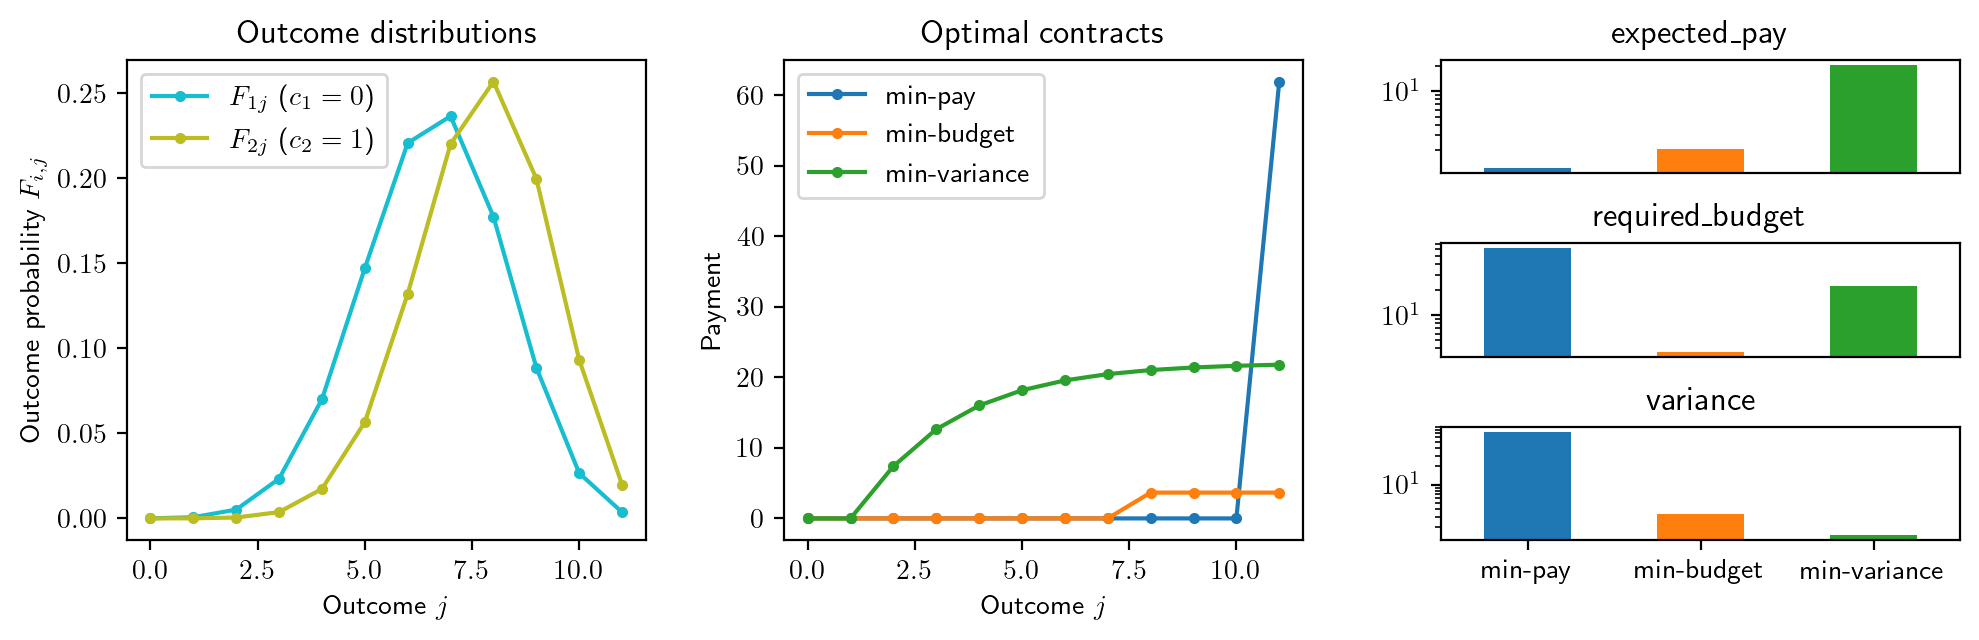

In [4]:
fig = plt.figure(figsize=(10,3.3),tight_layout={'w_pad':2})

ax = fig.add_subplot(1,3,1)
for i in range(len(F)):
    ax.plot(
        F[i],
        '.-',
        color=list(matplotlib.colors.TABLEAU_COLORS)[-(i+1)],
        label=f'$F_{{{i+1}j}}$ ($c_{{{i+1}}}={c[i]:g}$)',
    )
ax.set(
    title='Outcome distributions',
    xlabel='Outcome $j$',
    ylabel='Outcome probability $F_{i,j}$',
)
ax.legend()

ax = fig.add_subplot(1,3,2)
for i,(contract_name, t) in enumerate(t_opt.items()):
    ax.plot(
        t,
        '.-',
        label=contract_name,
    )
ax.legend()
ax.set(
    title='Optimal contracts',
    xlabel='Outcome $j$',
    ylabel='Payment',
)

axs = [
    fig.add_subplot(3,3,3),
    fig.add_subplot(3,3,6),
    fig.add_subplot(3,3,9),
]

contract_stats_df = (
    pd.Series(t_opt)
    .apply(lambda t: statcontracts.contract_objectives(F,c,t))
    .apply(pd.Series)
)

for ax, (i,row) in zip(axs,contract_stats_df.transpose().iterrows()):
    row.plot.bar(
        ax=ax,
        logy=True,
        color=list(matplotlib.colors.TABLEAU_COLORS),
    )
    if i!='variance':
        ax.set_xticks([])
    else:
        ax.tick_params(axis='x', labelrotation=0)
    ax.set_title(i)
